In [127]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dropout, Conv2D, Rescaling
from keras.layers import Dense

In [214]:
classifier = Sequential()
classifier.add(Convolution2D(filters=64, kernel_size=(3, 3), input_shape=(80, 80, 3), kernel_initializer='he_uniform', activation='relu'))
classifier.add(MaxPooling2D(pool_size=(5, 5)))
classifier.add(Flatten())
classifier.add(Dense(units=62, kernel_initializer='glorot_uniform', activation='relu'))
classifier.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
classifier.add(Dense(units=3, kernel_initializer='glorot_uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [215]:
classifier.load_weights('data.hdf5')

In [234]:
import numpy as np
test_image = keras.utils.load_img('dataset/test_set/normal/7386.png', target_size = (80, 80, 3))
test_image = keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
if result[0][0] == 0 :
    prediction = 'benign'
elif result[0][0] == 1 :
    prediction = 'malignant'
elif result[0][0] == 2 :
    prediction = 'normal'

1/1 [==============================] - 0s 37ms/step


In [235]:
result[0]

array([1., 1., 1.], dtype=float32)

In [205]:
prediction

'malignant'

In [138]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size=1
test_set = test_datagen.flow_from_directory(directory= 'dataset/test_set', target_size=(80, 80), batch_size=batch_size, classes = ['benign', 'malignant', 'normal'], class_mode='categorical')

Found 2238 images belonging to 3 classes.


In [139]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

2238/2238 [==============================] - 6s 3ms/step


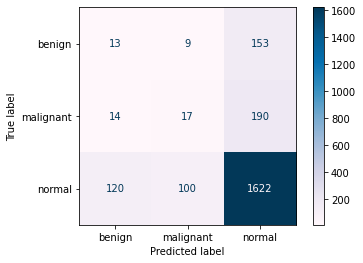

In [163]:
y_prediction = classifier.predict(test_set)
y_prediction = np.argmax(y_prediction, axis = 1)

cm = confusion_matrix(test_set.labels, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'malignant', 'normal'])

disp.plot(cmap=plt.cm.PuBu)
plt.show()
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')